<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/04_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#럭키백의 확률

In [16]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%matplotlib inline

In [3]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

# 거리 개념을 사용하는 경우 데이터들의 스케일 표준화가 필요함 (StandardScaler) ex. KNN(최근접 이웃), LR(회귀) 
# cm, kg 단위가 다른데 그대로 비교하면 왜곡됨 -> 표준화
# 천~만 사이의 값, 만~ 억 사이의 값 모두 다 다름

# 뒤의 트리의 경우 거리 개념이 들어가지 않으므로 스케일 표준화 필요 없음

# 잘 모르겠으면 다 스케일 표준화를 하면 된다 - 안하는게 문제지 해도 문제 없을 듯

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
np.sort(pd.unique(fish['Species'])) # 결과로 나올 값(target) = 종의 이름 7개

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [5]:
fish_target = fish['Species'].to_numpy() 

In [6]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() #input = 분석할 feature들(학습 데이터들)

In [7]:
# 위의 코드처럼 컬럼들을 직접 입력할 수 없을 때 아래의 코드를 사용하자
fish_input = fish.drop('Species', axis=1).to_numpy()

In [8]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [10]:
train_input.shape, train_target.shape

((119, 5), (119,))

In [11]:
test_input.shape, test_target.shape #train_test_split 순서 바꿔서 쓰지 않도록 항상 주의

((40, 5), (40,))

In [12]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input) #데이터 준비 완료!

###k-최근접 이웃 분류기의 확률 예측
다중 분류(MultiClass Classification) : 타깃 데이터에 2개 이상의 클래스가 포함된 문제  
이 예제는 다중 분류 -> target이 7개 이므로 취할 수 있는 클래스는 7개! 또한, 각각에 해당하는 확률이 존재  

- predict() -> 클래스 라벨 반환
- predict_proba() -> 7개 클래스에 대한 각각의 확률 반환

In [13]:
kn = KNeighborsClassifier(n_neighbors=3) #가장 가까운 샘플 3개 선택
kn.fit(train_scaled, train_target)

print(kn.classes_) #타깃값 알파벳 순으로 출력
print(kn.predict(test_scaled[:5])) #테스트 세트의 처음 5개 샘플 타깃값 예측

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [14]:
# 예측이 어떠한 확률값을 가지고 나왔는지 알아보기

proba = kn.predict_proba(test_scaled[:5]) #각각에 해당하는 확률 예측
print(np.round(proba, decimals=4)) #decimals로 소수점 4번째 자리까지 표기 = 5번째 자리에서 반올림

#Bream확률, Parkki 확률 , ...

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
indexes = kn.kneighbors(test_scaled[3:4], return_distance = False)
print(train_target[indexes]) # 4번째 샘플의 최근접 이웃 클래스들

[['Roach' 'Perch' 'Perch']]


위의 과정은 근접한 3개의 클래스를 가지고 결정하는 것이므로 확률이  
0/3, 1/3, 2/3, 3/3 밖에 없다.  

-> 모형에 대한 한계를 이해  
-> 다른 모형을 선택해보기

#로지스틱 회귀

####시그모이드 함수 예시

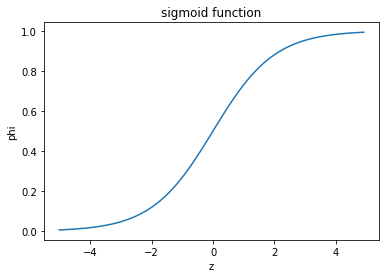

In [19]:
z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.title('sigmoid function')
plt.show()

####로지스틱 회귀로 이진 분류 수행하기
이진 분류(binary classification)
- 1 : 양성 클래스 대표값
- 0 : 음성 클래스 대표값

In [20]:
# boolean indexing
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [22]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') #도미, 빙어일 경우만 True, 외엔 모두 False로 설정
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

# 해당 데이터로, 도미와 빙어의 데이터만 골라낼 수 있다

In [23]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5])) # 훈련 모델을 이용해 처음 5개 샘플을 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
print(lr.predict_proba(train_bream_smelt[:5])) # 처음 5개 샘플의 예측 확률

# [0(음성 클래스일 확률), 1(양성 클래스일 확률)]

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [25]:
lr.classes_

# 빙어(Smelt)가 양성, 도미(Bream)이 음성
# 클래스 정보를 문자열로 줬으므로 알파벳 순으로 정렬되었기 때문에 B가 앞으로 왔다.

array(['Bream', 'Smelt'], dtype=object)

In [43]:
# 도미를 양성으로 두고 싶다면? 변환해야함

target_bream_smelt_1_0 = np.where(target_bream_smelt == 'Bream', 1, 0) # 타겟 변경할 때, np.where 많이 쓰니까 기억해두기!!
lr= LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt_1_0)

LogisticRegression()

In [44]:
lr.predict(train_bream_smelt[:5]) # Bream = 1

array([1, 0, 1, 1, 1])

In [45]:
print(lr.coef_, lr.intercept_)
#로지스틱 회귀가 학습한 계수

# 즉, 로지스틱 회귀가 학습한 방정식 - 선형 회귀와 매우 비슷하다
# z = -0.4037798 * weight + (-0.57620209) * length + (-0.66280298) * diagonal + (-1.01290277) * height + (-0.73168947) * width + (-2.16155132)

[[0.4037798  0.57620209 0.66280298 1.01290277 0.73168947]] [2.16155132]


In [46]:
decisions = lr.decision_function(train_bream_smelt[:5])
decisions # = z값을 뽑아낼 수 있음

array([ 6.02927744, -3.57123907,  5.26568906,  4.24321775,  6.0607117 ])

In [47]:
from scipy.special import expit
print(expit(decisions)) #양성일 확률(시그모이드 함수)를 구하는 함수

[0.99759855 0.02735183 0.99486072 0.98584202 0.99767269]


####로지스틱 회귀로 다중 분류 수행하기
이진 분류와 다를 것이 없음!  
- 이진 분류 -> sigmoid(0 or 1)  
- 다중 분류 -> softmax(클래스의 개수 3개 이상이면 무조건 사용)  

In [81]:
# lr = LogisticRegression()
# 0.8067226890756303 -> underfit 이므로 조정해줘야 함
# 0.85
lr = LogisticRegression(C=10000, max_iter=1000) 
# C:규제 강도의 역수(클수록 규제가 느슨함) , max_iter:반복 횟수 (default=100 부족하므로 늘린다)
lr.fit(train_scaled, train_target)
print(accuracy_score(train_target, lr.predict(train_scaled)))
print(accuracy_score(test_target, lr.predict(test_scaled)))

1.0
0.975


In [69]:
ir = [0.1, 0.5, 1, 10, 20, 100, 1000, 10000, 100000, 10000000]
for n in ir:
  lr = LogisticRegression(C=n, max_iter=1000)
  lr.fit(train_scaled, train_target)
  print(f"C:{n}")
  print(f"   train score : {accuracy_score(train_target, lr.predict(train_scaled))}")
  print(f"   test score : {accuracy_score(test_target, lr.predict(test_scaled))}")

# test_scaled.shape 현재 feature가 5개로 적은 상태 -> 규제 완화가 필요

# C:10000 ----> best! ---> 규제를 느슨히 하였더니 결과가 좋게 나왔다
#   train score : 1.0
#   test score : 0.975

C:0.1
   train score : 0.7058823529411765
   test score : 0.775
C:0.5
   train score : 0.8067226890756303
   test score : 0.85
C:1
   train score : 0.8067226890756303
   test score : 0.85
C:10
   train score : 0.9159663865546218
   test score : 0.925
C:20
   train score : 0.9327731092436975
   test score : 0.925
C:100
   train score : 0.9831932773109243
   test score : 0.925
C:1000
   train score : 0.9915966386554622
   test score : 0.95
C:10000
   train score : 1.0
   test score : 0.975
C:100000
   train score : 1.0
   test score : 0.975
C:10000000
   train score : 1.0
   test score : 0.925


In [80]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [79]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [82]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.829 0.    0.171 0.   ]
 [0.    0.007 0.005 0.    0.405 0.    0.583]
 [0.    0.    1.    0.    0.    0.    0.   ]]


소프트 맥스 함수 = 다중 클래스에서 각 클래스의 확률을 계산하는 함수  
- 이진 분류에서는 시그모이드 함수를 이용하여 z를 0~1 값으로 변환
- 다중 분류에서는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환

In [83]:
from scipy.special import softmax

decision = lr.decision_function(test_scaled[:5])
proba = softmax(decision, axis=1) #행에 대해 적용 (각 feature에 대해 적용 -> axis=0, 각 샘플에 대해 적용 -> axis=1)
print(np.round(proba, decimals=3))  

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.829 0.    0.171 0.   ]
 [0.    0.007 0.005 0.    0.405 0.    0.583]
 [0.    0.    1.    0.    0.    0.    0.   ]]
